In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import time
import d2lzh_pytorch as d2l

In [5]:
mnist_train = torchvision.datasets.FashionMNIST(root = '-/Datasets/FashionMNIST', train=True, download=True, transform=transforms.ToTensor())
mnist_test = torchvision.datasets.FashionMNIST(root = '-/Datasets/FashionMNIST', train=False, download=True, transform=transforms.ToTensor())

print(type(mnist_train))
print(len(mnist_train), len(mnist_test))

100.0%Extracting -/Datasets/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to -/Datasets/FashionMNIST\FashionMNIST\raw
111.0%Extracting -/Datasets/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to -/Datasets/FashionMNIST\FashionMNIST\raw
100.0%Extracting -/Datasets/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to -/Datasets/FashionMNIST\FashionMNIST\raw
159.1%Extracting -/Datasets/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to -/Datasets/FashionMNIST\FashionMNIST\raw
Processing...
Done!
<class 'torchvision.datasets.mnist.FashionMNIST'>
60000 10000


In [6]:
feature, label = mnist_train[0]
print(feature.shape, label)

torch.Size([1, 28, 28]) 9


In [7]:
def get_fashion_mnist_labels(labels):
    text_labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
    return [text_labels[int(i)] for i in labels]

In [8]:
def show_fashion_mnist(images, labels):
    d2l.use_svg_display()
    _, figs = plt.subplots(1, len(images), figsize=(12, 12))
    for f, img, lbl in zip(figs, images, labels):
        f.imshow(img.view((28, 28)).numpy())
        f.set_title(lbl)
        f.axes.get_xaxis().set_visible(False)
        f.axes.get_yaxis().set_visible(False)
    plt.show()

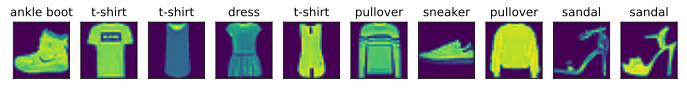

In [9]:
X, y = [], []
for i in range(10):
    X.append(mnist_train[i][0])
    y.append(mnist_train[i][1])

show_fashion_mnist(X, get_fashion_mnist_labels(y))

In [10]:
batch_size = 256

train_iter = torch.utils.data.DataLoader(mnist_train, batch_size=batch_size, shuffle=True)
test_iter = torch.utils.data.DataLoader(mnist_test, batch_size=batch_size, shuffle=False)

start = time.time()

for X, y in train_iter:
    continue

print('%.2f sec' % (time.time() - start))

7.10 sec


# SOFTMAX回归的从零开始实现

In [11]:
import torch
import torchvision
import numpy as np
import d2lzh_pytorch as d2l

In [12]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

100.0%Extracting C:\Users\alex/Datasets/FashionMNIST\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\alex/Datasets/FashionMNIST\FashionMNIST\raw
111.0%Extracting C:\Users\alex/Datasets/FashionMNIST\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\alex/Datasets/FashionMNIST\FashionMNIST\raw
100.0%Extracting C:\Users\alex/Datasets/FashionMNIST\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\alex/Datasets/FashionMNIST\FashionMNIST\raw
159.1%Extracting C:\Users\alex/Datasets/FashionMNIST\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\alex/Datasets/FashionMNIST\FashionMNIST\raw
Processing...
Done!


In [13]:
num_inputs = 784
num_outputs = 10

W = torch.tensor(np.random.normal(0, 0.01, (num_inputs, num_outputs)), dtype=torch.float)
b = torch.zeros(num_outputs, dtype=torch.float)

W.requires_grad_(requires_grad = True)
b.requires_grad_(requires_grad = True)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [14]:
X = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(X.sum(dim=0, keepdim=True))
print(X.sum(dim=1, keepdim=True))

tensor([[5, 7, 9]])
tensor([[ 6],
        [15]])


In [15]:
def softmax(X):
    X_exp = X.exp()
    partition = X_exp.sum(dim=1, keepdim=True)
    return X_exp / partition

In [16]:
X = torch.rand((2, 5))
X_prob = softmax(X)
print(X_prob, X_prob.sum(dim=1))

tensor([[0.1620, 0.2002, 0.1764, 0.2385, 0.2230],
        [0.1891, 0.1663, 0.3012, 0.1608, 0.1826]]) tensor([1.0000, 1.0000])


In [17]:
def net(X):
    return softmax(torch.mm(X.view((-1, num_inputs)), W) + b)

In [21]:
y_hat = torch.tensor([[0.1, 0.3, 0.6], [0.3, 0.2, 0.5]])
y = torch.LongTensor([0, 2])
y_hat.gather(1, y.view(-1, 1))

tensor([[0.1000],
        [0.5000]])

In [18]:
def cross_entropy(y_hat, y):
    return - torch.log(y_hat.gather(1, y.view(-1, 1)))

In [19]:
def accuracy(y_hat, y):
    return (y_hat.argmax(dim=1) == y).float().mean().item()

In [22]:
print(accuracy(y_hat, y))

0.5


In [23]:
def evaluate_accuracy(data_iter, net):
    acc_sum, n = 0.0, 0
    for X, y in data_iter:
        acc_sum += (net(X).argmax(dim=1) == y).float().sum().item()
        n += y.shape[0]
    return acc_sum / n

In [24]:
print(evaluate_accuracy(test_iter, net))

0.123


In [25]:
num_epochs, lr = 5, 0.1

def train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, params=None, lr=None, optimizer=None):
    for epoch in range(num_epochs):
        train_l_sum, train_acc_sum, n = 0.0, 0.0, 0
        for X, y in train_iter:
            y_hat = net(X)
            l = loss(y_hat, y).sum()

            if optimizer is not None:
                optimizer.zero_grad()
            elif params is not None and params[0].grad is not None:
                for param in params:
                    param.grad.data.zero_()
            
            l.backward()
            if optimizer is None:
                d2l.sgd(params, lr, batch_size)
            else:
                optimizer.step()

            train_l_sum += l.item()
            train_acc_sum += (y_hat.argmax(dim=1) == y).sum().item()
            n += y.shape[0]
        
        test_acc = evaluate_accuracy(test_iter, net)
        print('epoch %d, loss %.4f, train acc %.3f, test acc %.3f' % (epoch + 1, train_l_sum / n, train_acc_sum / n, test_acc))

train_ch3(net, train_iter, test_iter, cross_entropy, num_epochs, batch_size, [W, b], lr)

epoch 1, loss 0.7851, train acc 0.746, test acc 0.792
epoch 2, loss 0.5703, train acc 0.814, test acc 0.810
epoch 3, loss 0.5259, train acc 0.825, test acc 0.822
epoch 4, loss 0.5018, train acc 0.832, test acc 0.822
epoch 5, loss 0.4854, train acc 0.837, test acc 0.828


预测

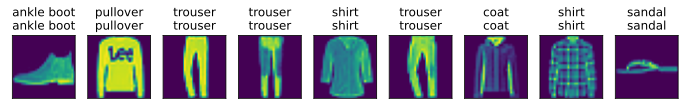

In [26]:
X, y = iter(test_iter).next()

true_labels = d2l.get_fashion_mnist_labels(y.numpy())
pred_labels = d2l.get_fashion_mnist_labels(net(X).argmax(dim=1).numpy())
titles = [true + '\n' + pred for true, pred in zip(true_labels, pred_labels)]

d2l.show_fashion_mnist(X[0:9], titles[0:9])

# SOFTMAX回归的简洁实现

In [1]:
import torch
from torch import nn
from torch.nn import init
import numpy as np
import d2lzh_pytorch as d2l


In [2]:
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [4]:
num_inputs = 784
num_outputs = 10

class LinearNet(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(LinearNet, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)

    def forward(self, x):
        y = self.linear(x.view(x.shape[0], -1))
        return y

net = LinearNet(num_inputs, num_outputs)

In [5]:
class FlattenLayer(nn.Module):
    def __init__(self):
        super(FlattenLayer, self).__init__()
    
    def forward(self, x):
        return x.view(x.shape[0], -1)

In [6]:
from collections import OrderedDict

net = nn.Sequential(
    OrderedDict(
        [
            ('flatten', FlattenLayer()),
            ('linear', nn.Linear(num_inputs, num_outputs))
        ]
    )
)

In [7]:
init.normal_(net.linear.weight, mean=0, std=0.01)
init.constant_(net.linear.bias, val=0)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [8]:
loss = nn.CrossEntropyLoss()

In [9]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.1)

In [10]:
num_epochs = 5
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, batch_size, None, None, optimizer)

epoch 1, loss 0.0031, train acc 0.746, test acc 0.791
epoch 2, loss 0.0022, train acc 0.814, test acc 0.813
epoch 3, loss 0.0021, train acc 0.825, test acc 0.805
epoch 4, loss 0.0020, train acc 0.832, test acc 0.817
epoch 5, loss 0.0019, train acc 0.837, test acc 0.829
